<a href="https://colab.research.google.com/github/yash66gupta/Heart-disease-analysis/blob/main/Heart_disease_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data Dictionary
### A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

**### The following are the features we'll use to predict our target variable (heart disease or no heart disease).**

  1. age - age in years
  2. sex - 1 = male; 0 = female
  3. cp - chest pain type

      0: Typical angina: chest pain related decrease blood supply to the heart
    
      1: Atypical angina: chest pain not related to heart
    
      2: Non-anginal pain: typically esophgael spasms (non heart related)
    
      3: Asymptomatic: chest pain not showing signs of disease
  4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  5. chol - serum cholestoral in mg/dl

      serum = LDL + HDL + .2 * triglycerides
    
      above 200 is cause for concern
  6. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
      '>126' mg/dL signals diabetes
  7. restecg - resting electrocardiographic results
      
      0: Nothing to note
      
      1: ST-T Wave abnormality
      can range from mild symptoms to severe problems
      signals non-normal heart beat
      
      2: Possible or definite left venticular hypertrophy
      Enlarged heart's main pumping chamber
  8. thalach - maximum heart rate achieved
  9. exang - exercise induced angina (1 = yes; 0 = no)
  10. oldpeak - ST depression induced by exercise relative to rest
      looks at stress of heart during excercise
      unhealthy heart will stress more
  11. slope - the slope of the peak exercise ST segment
      
      0: Unsloping: better heart rate with excercise (uncommon)
      
      1: Flatsloping: minimal change (typical healthy heart)
      
      2: Downsloping: Signs of unhealthy heart
  12. ca - number of major vessels (0-3) colored by flourosopy
      
      colored vessel means the doctor can see the blood passing through
      
      the more blood movement the better (no clots)
  13. thal - thalium stress result
      
      1,3 = normal
      
      6 = fixed defect: Used to be defect but ok now
      
      7 = reversable defect: no proper blood movement when excercising
  14. target - have disease or not (1=yes, 0=no)(= the predicted attribute

**Note**: No personal identifiable information (PPI) can be found in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file = "/content/drive/MyDrive/Heart Disease data.csv"

In [5]:
df = pd.read_csv(file)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
df.shape

(1025, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
len(df[df.duplicated()])

723

In [12]:
df.duplicated().value_counts()

True     723
False    302
Name: count, dtype: int64

In [13]:
df1=df.drop_duplicates()

In [14]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df1.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [18]:
df1['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

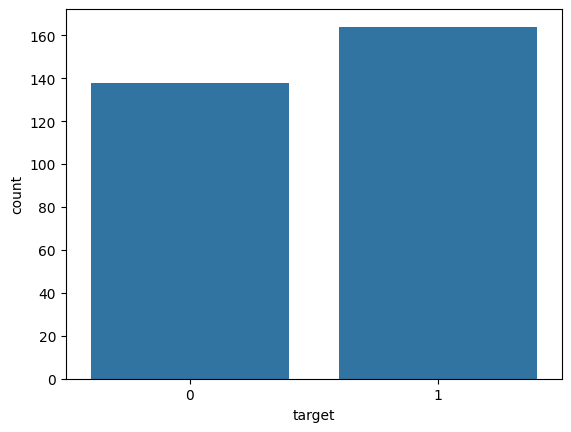

In [19]:
sns.countplot(x= 'target', data= df1)
plt.show()

In [20]:
df1['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

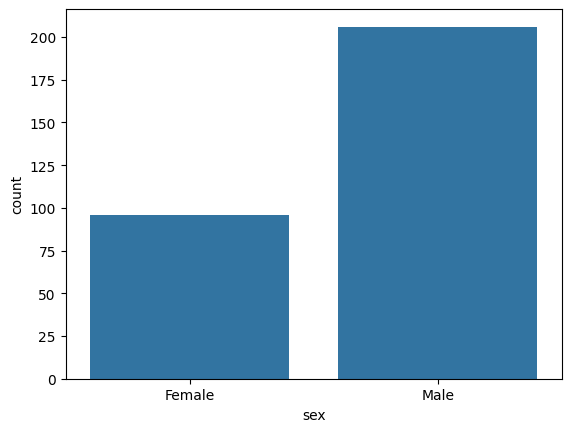

In [21]:
sns.countplot(x='sex', data= df1)
plt.xticks([0,1],['Female','Male'])
plt.show()

In [22]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

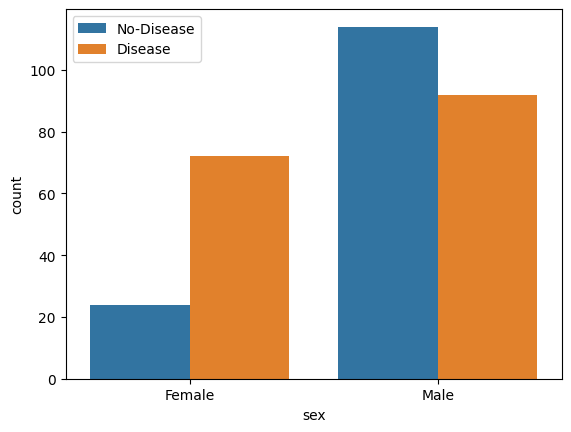

In [23]:
sns.countplot(x='sex',hue='target',data=df1)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

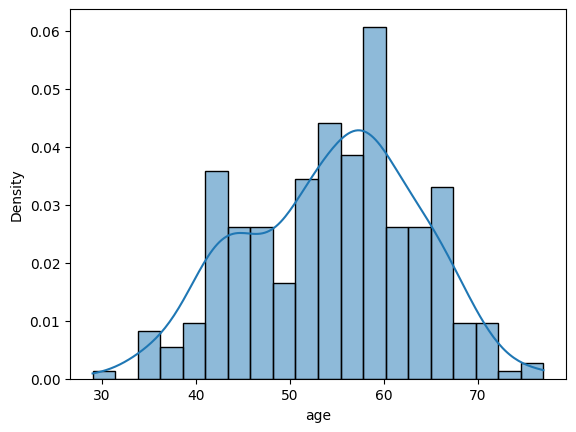

In [24]:
sns.histplot(df1["age"], kde=True, stat="density",bins=20)
plt.show()

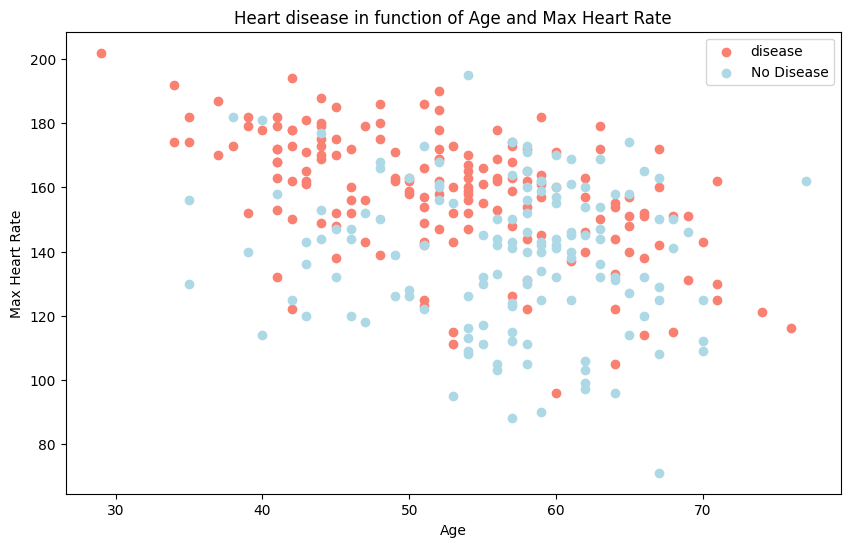

In [25]:
plt.figure(figsize=(10, 6))

# Scatter with possitive examples
plt.scatter(df1.age[df1.target == 1], df1.thalach[df1.target == 1], c="salmon")

# Scatter with negative examples
plt.scatter(df1.age[df1.target == 0], df1.thalach[df1.target == 0], c="lightblue")

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["disease", "No Disease"])

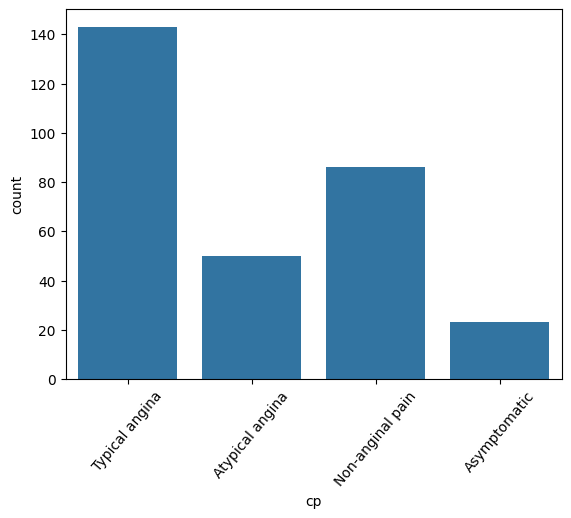

In [26]:
sns.countplot(x='cp',data=df1)
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'],rotation=50)
plt.show()

In [27]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

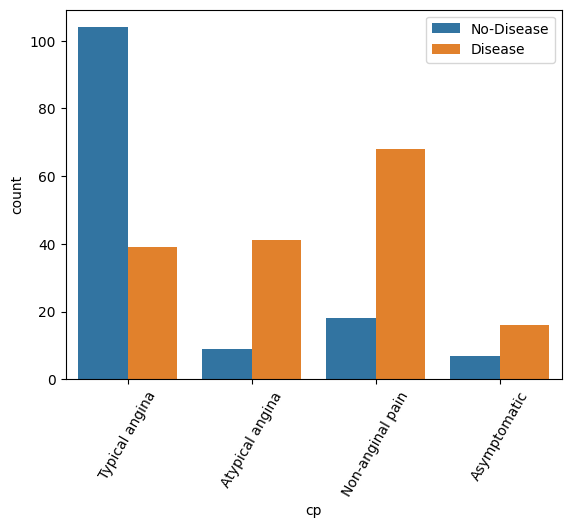

In [28]:
sns.countplot(x='cp',hue='target',data=df1)
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'],rotation=60)
plt.legend(labels=['No-Disease','Disease'])
plt.show()


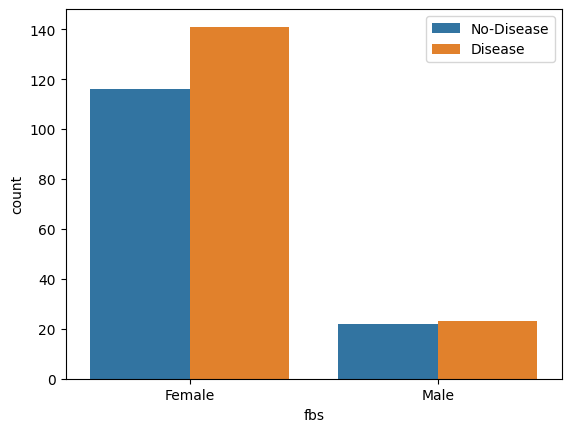

In [29]:
sns.countplot(x='fbs',hue='target',data=df1)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()


<Axes: >

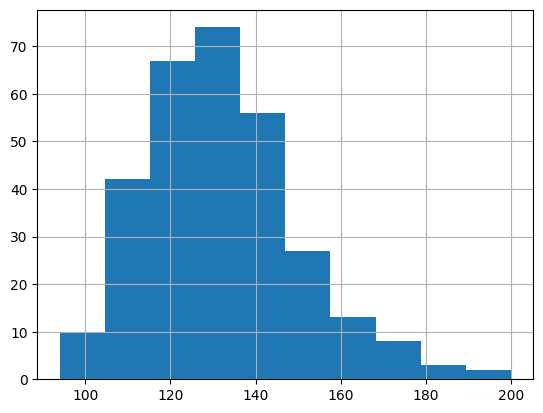

In [30]:
df1['trestbps'].hist()

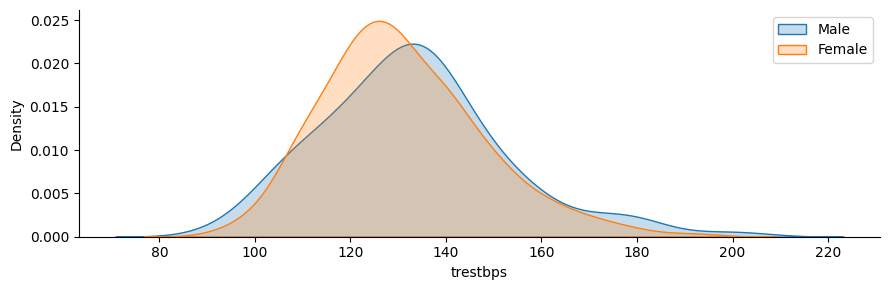

In [31]:
sb= sns.FacetGrid(df1,hue='sex',aspect=3)
sb.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.show()

In [32]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

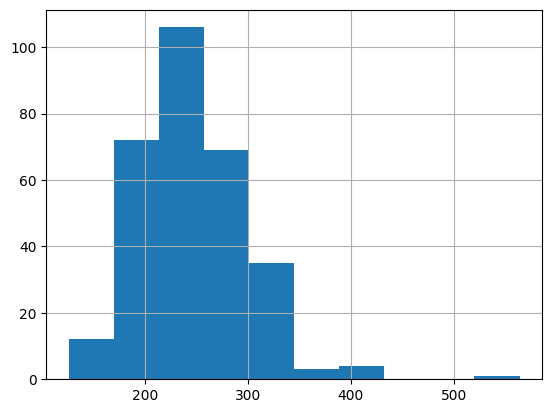

In [33]:
df1['chol'].hist()

In [34]:
categorical_values=[]
continues_values=[]
for i in df1.columns:
  if df1[i].nunique()<=10:
    categorical_values.append(i)
  else:
    continues_values.append(i)

In [35]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [36]:
continues_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

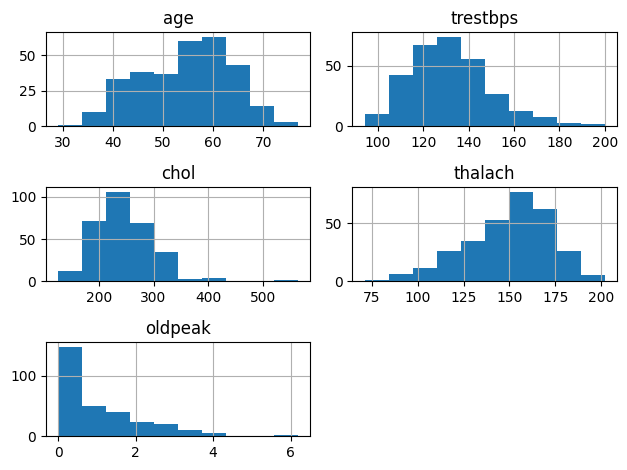

In [37]:
df1.hist(continues_values)
plt.tight_layout()
plt.show()